In [7]:
import random

num_city = 100
num_air = 3
cities = set()
airports = []

for i in range(num_city):
    x = random.random()
    y = random.random()
    cities.add((x,y))
    
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))
    
def f():
    distance = 0
    for a in airports:
        for c in cities:
            distance += ((a[0] - c[0])**2) + ((a[1] - c[1])**2)
    return distance

print(f())

def split_cities():
    c1 = set()
    c2 = set()
    c3 = set()
    
    for c in cities:
        distanceA = ((airports[0][0] - c[0])**2) + ((airports[0][1] - c[1])**2)
        distanceB = ((airports[1][0] - c[0])**2) + ((airports[1][1] - c[1])**2)
        distanceC = ((airports[2][0] - c[0])**2) + ((airports[2][1] - c[1])**2)
        distances = [distanceA, distanceB, distanceC]
        if distanceA == max(distances):
            c1.add(c)
        elif distanceB == max(distances):
            c2.add(c)
        else:
            c3.add(c)
    return c1, c2, c3

c1, c2, c3 = split_cities()
print(c1)
print(c2)
print(c3)

def gradient_element():
    pass
    

60.70718454834626
{(0.39982015238705537, 0.745092650987271), (0.6701868919024047, 0.8153029700247915), (0.6416202805499795, 0.6270828898830015), (0.4811301950558906, 0.6515728182653934), (0.6891783542181787, 0.7591874657718839), (0.2961918358987802, 0.5653348517881307), (0.12000378094798236, 0.8605268487626507), (0.6422618896086455, 0.6119991055145153), (0.9787358496678493, 0.9145538755780318), (0.3006992191211839, 0.8416364203371863), (0.47842915784572615, 0.5892260618033988), (0.05717357878004237, 0.6342158270236065), (0.3197689312915898, 0.938968212820569), (0.8582405545159908, 0.9380000901300929), (0.13251498194291267, 0.6222408971869968), (0.19955440211734232, 0.7876494105055266), (0.5106457510272752, 0.6242720278308853), (0.3907677537211871, 0.6132295962968165), (0.2801542907954272, 0.8585704333917059), (0.90670557492665, 0.8725921710925), (0.055875822646374806, 0.8980501380041539), (0.2414331609664826, 0.730222995145812), (0.2793071242311649, 0.9631003485229449), (0.255168846278

<module 'matplotlib.pyplot' from '/home/jmoon/.conda/envs/mlenv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

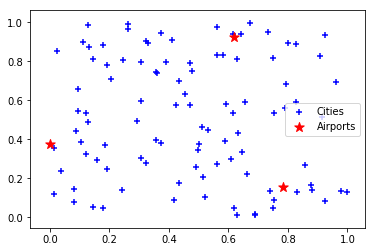

In [33]:
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

The objective function is given by $f(x_1,y_1,x_2,y_2,x_3,y_3)=\sum_{i=1}^n\sum_{c\in C_i}(x_i-x_c)^2+(y_i-y_c)^2$ where $n$ is the number of the airports and $C_i$ is the set of cities whose closest airport is airport $i$. The goal of the program is determining the locations of airports that minimize the objective function using gradient based optimizatoin. 

The gradient of the objective function is $\nabla f(x_1,y_1,x_2,y_2,x_3,y_3)=\big(2\sum_{c\in C_1}(x_1-x_c),2\sum_{c\in C_1}(y_1-y_c),2\sum_{c\in C_2}(x_2-x_c),2\sum_{c\in C_2}(y_2-y_c),2\sum_{c\in C_3}(x_3-x_c),2\sum_{c\in C_3}(y_3-y_c)\big)$

By updating $(x_1,y_1,x_2,y_2,x_3,y_3)\gets (x_1,y_1,x_2,y_2,x_3,y_3)-\alpha \nabla f(x_1,y_1,x_2,y_2,x_3,y_3)$ where $0<\alpha\ll1$ is a constant, **find the optimal locations of the airports $(x_1,y_1,x_2,y_2,x_3,y_3)$.**

Every time the locations of the airports are updated, **plot the objective value as shown in the figure**.

<Note: The objective values may be different than the example.>
<img src="airports_loss.png" style="width:400px">